# Trabalho Prático - Projeto e Análise de Algoritmos

## Testes

Instalando requisitos

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import subprocess
import pandas
import numpy
import matplotlib
import matplotlib.pyplot
import seaborn

Definindo variáveis

In [3]:
distancias_minimas=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
algoritmos=['forca-bruta', 'branch-and-bound']
entradas = [[2, 2, '2_franquias_2_lojas.txt'], [2, 5, '2_franquias_5_lojas.txt'], [3, 3, '3_franquias_3_lojas.txt'], [5, 2, '5_franquias_2_lojas.txt'], [_, _, 'exemplo_professor.txt']]

Executando o programa e salvando a saida

In [4]:
dados = []
for _ in range(3):
    for entrada in entradas:
        for distancia_minima in distancias_minimas:
            for algoritmo in algoritmos:
                saida = subprocess.run(['java -jar app.jar --calcular-tempo --arquivo-dados {} --distancia-minima {} --algoritmo {}'.format(entrada[2], distancia_minima, algoritmo)], shell=True, capture_output=True, text=True)
                algoritmo = 'Força Bruta' if algoritmo == 'forca-bruta' else 'Branch and Bound'
                dados.append([entrada[0], entrada[1], distancia_minima, algoritmo, saida.stdout.replace('\n', '').replace('ns', ''), entrada[2]])

Criando um pandas data frame

In [5]:
legenda = ['Número de Franquias', 'Número de Lojas por franquia', 'Distância Mínima', 'Algoritmo', 'Tempo de Execução', 'Arquivo de Dados']

In [6]:
dados = pandas.DataFrame(dados, columns=legenda)

In [7]:
dados

,Número de Franquias,Número de Lojas por franquia,Distância Mínima,Algoritmo,Tempo de Execução,Arquivo de Dados
0,2,2,0,Força Bruta,685530,2_franquias_2_lojas.txt
1,2,2,0,Branch and Bound,575672,2_franquias_2_lojas.txt
2,2,2,1,Força Bruta,633800,2_franquias_2_lojas.txt
3,2,2,1,Branch and Bound,564724,2_franquias_2_lojas.txt
4,2,2,2,Força Bruta,625080,2_franquias_2_lojas.txt
...,...,...,...,...,...,...
355,,,256,Branch and Bound,11700470,exemplo_professor.txt
356,,,512,Força Bruta,870001082,exemplo_professor.txt
357,,,512,Branch and Bound,10164135,exemplo_professor.txt
358,,,1024,Força Bruta,1011598235,exemplo_professor.txt


Exportando dados

In [8]:
dados.to_csv('dados.csv', index=False)

In [9]:
dados

,Número de Franquias,Número de Lojas por franquia,Distância Mínima,Algoritmo,Tempo de Execução,Arquivo de Dados
0,2,2,0,Força Bruta,685530,2_franquias_2_lojas.txt
1,2,2,0,Branch and Bound,575672,2_franquias_2_lojas.txt
2,2,2,1,Força Bruta,633800,2_franquias_2_lojas.txt
3,2,2,1,Branch and Bound,564724,2_franquias_2_lojas.txt
4,2,2,2,Força Bruta,625080,2_franquias_2_lojas.txt
...,...,...,...,...,...,...
355,,,256,Branch and Bound,11700470,exemplo_professor.txt
356,,,512,Força Bruta,870001082,exemplo_professor.txt
357,,,512,Branch and Bound,10164135,exemplo_professor.txt
358,,,1024,Força Bruta,1011598235,exemplo_professor.txt


Gerando gráficos

In [10]:
dados_media = {}
for index, row in dados.iterrows():
    if not (row['Algoritmo'], row['Distância Mínima']) in dados_media:
        dados_media.setdefault((row['Algoritmo'], row['Distância Mínima']), 0)
    else:
        dados_media[(row['Algoritmo'], row['Distância Mínima'])] += int(row['Tempo de Execução'])

dados_media

{('Força Bruta', 0): 9648636,
 ('Branch and Bound', 0): 10136008,
 ('Força Bruta', 1): 10733512,
 ('Branch and Bound', 1): 10207662,
 ('Força Bruta', 2): 9586277,
 ('Branch and Bound', 2): 9738034,
 ('Força Bruta', 4): 9888611,
 ('Branch and Bound', 4): 10263998,
 ('Força Bruta', 8): 9482701,
 ('Branch and Bound', 8): 10532814,
 ('Força Bruta', 16): 10084565,
 ('Branch and Bound', 16): 11422941,
 ('Força Bruta', 32): 12720598,
 ('Branch and Bound', 32): 44241871,
 ('Força Bruta', 64): 35909672,
 ('Branch and Bound', 64): 44152553,
 ('Força Bruta', 128): 347198021,
 ('Branch and Bound', 128): 64852283,
 ('Força Bruta', 256): 1593891291,
 ('Branch and Bound', 256): 113098660,
 ('Força Bruta', 512): 3741436675,
 ('Branch and Bound', 512): 113518157,
 ('Força Bruta', 1024): 7196060182,
 ('Branch and Bound', 1024): 122238402}

In [11]:
dados_grafico = {
    'Algoritmo': [],
    'Distância Mínima': [],
    'Tempo de Execução': []
}

for key, value in dados_media.items():
    algoritmo, distancia_minima = key
    tempo_execucao = value / 3
    dados_grafico['Algoritmo'].append(algoritmo)
    dados_grafico['Distância Mínima'].append(distancia_minima)
    dados_grafico['Tempo de Execução'].append(tempo_execucao)
    

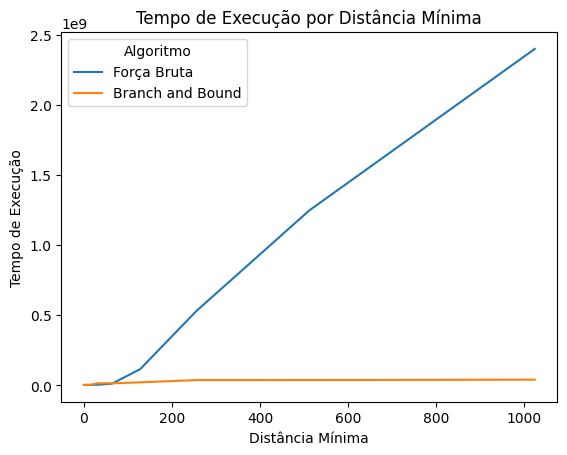

In [12]:
matplotlib.pyplot.figure()
seaborn.lineplot(x="Distância Mínima", y="Tempo de Execução", hue="Algoritmo", data=dados_grafico, style='Algoritmo', dashes=False)
matplotlib.pyplot.title('Tempo de Execução por Distância Mínima')
matplotlib.pyplot.xlabel('Distância Mínima')
matplotlib.pyplot.ylabel('Tempo de Execução')
matplotlib.pyplot.legend(title='Algoritmo')

matplotlib.pyplot.show()

In [13]:
media_algoritmos = {
    'Força Bruta': 0,
    'Branch and Bound': 0
}

for index, row in dados.iterrows():
    if row['Algoritmo'] == 'Força Bruta':
        media_algoritmos['Força Bruta'] += (int(row['Tempo de Execução']))
    else:
        media_algoritmos['Branch and Bound'] += (int(row['Tempo de Execução']))

media_algoritmos['Força Bruta'] = media_algoritmos['Força Bruta'] / 3
media_algoritmos['Branch and Bound'] = media_algoritmos['Branch and Bound'] / 3

In [14]:
media_algoritmos

{'Força Bruta': 4331641796.333333, 'Branch and Bound': 191367028.33333334}

<BarContainer object of 2 artists>

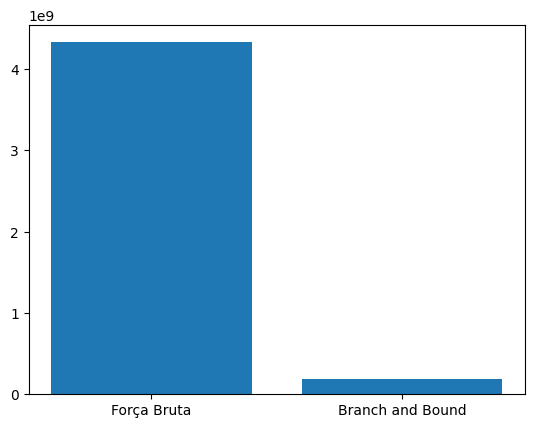

In [15]:
matplotlib.pyplot.figure()
matplotlib.pyplot.bar(media_algoritmos.keys(), media_algoritmos.values())